# GRAPHS for Assignment 1

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.3.c

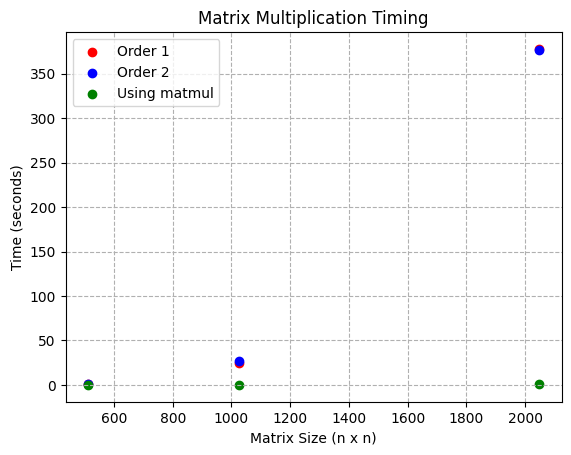

In [11]:
n = [512, 1024, 2048]
order_1_times = [1.12765598, 24.9724674, 377.806244]
order_2_times = [1.17655790, 27.0275803, 376.491333]
order_3_times = [1.74798965E-02, 0.140167236, 1.02026367]

plt.scatter(n, order_1_times, color='red', label='Order 1')
plt.scatter(n, order_2_times, color='blue', label='Order 2')
plt.scatter(n, order_3_times, color='green', label='Using matmul')

plt.title('Matrix Multiplication Timing')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True, linestyle="--")

plt.show()

In [12]:
data = {
    'Matrix Size (n)': n,
    'Order 1 Times (s)': order_1_times,
    'Order 2 Times (s)': order_2_times,
    'Using matmul Times (s)': order_3_times
}

df = pd.DataFrame(data)
print(df)

   Matrix Size (n)  Order 1 Times (s)  Order 2 Times (s)  \
0              512           1.127656           1.176558   
1             1024          24.972467          27.027580   
2             2048         377.806244         376.491333   

   Using matmul Times (s)  
0                0.017480  
1                0.140167  
2                1.020264  


### Maximum value of n

```bash
Enter the size of the matrices (n x n):
34235
In file 'matmul_timing.f90', around line 14: Error allocating 4688140900 bytes: Cannot allocate memory

Error termination. Backtrace:
#0  0x7f3f7f376960 in ???
#1  0x7f3f7f3774d9 in ???
#2  0x55da82746545 in MAIN__
#3  0x55da8274730c in main

## 1.3.d

### -O1

In [14]:
n = [512, 1024, 2048]
order_1_times = [0.526571035, 11.9973927, 138.946625]
order_2_times = [0.528330028, 12.1578131, 135.419937]
order_3_times = [0.0277040005, 0.127893448, 0.991485596]

data = {
    'Matrix Size (n)': n,
    'Order 1 Times (s)': order_1_times,
    'Order 2 Times (s)': order_2_times,
    'Using matmul Times (s)': order_3_times
}

df = pd.DataFrame(data)
print(df)

   Matrix Size (n)  Order 1 Times (s)  Order 2 Times (s)  \
0              512           0.526571           0.528330   
1             1024          11.997393          12.157813   
2             2048         138.946625         135.419937   

   Using matmul Times (s)  
0                0.027704  
1                0.127893  
2                0.991486  


### -O2

In [15]:
n = [512, 1024, 2048]
order_1_times = [0.537990987, 12.0897379, 144.437378]
order_2_times = [0.534588993, 11.9433784, 143.687271]
order_3_times = [0.0226190090, 0.133092880, 1.05465698]

data = {
    'Matrix Size (n)': n,
    'Order 1 Times (s)': order_1_times,
    'Order 2 Times (s)': order_2_times,
    'Using matmul Times (s)': order_3_times
}

df = pd.DataFrame(data)
print(df)

   Matrix Size (n)  Order 1 Times (s)  Order 2 Times (s)  \
0              512           0.537991           0.534589   
1             1024          12.089738          11.943378   
2             2048         144.437378         143.687271   

   Using matmul Times (s)  
0                0.022619  
1                0.133093  
2                1.054657  


### -O3

In [23]:
n = [512, 1024, 2048, 4096]
order_1_times = [0.430553052, 8.1203804, 102.507225, 833.037476]
order_2_times = [0.453086987, 8.37307453, 98.5219879, 808.341858]
order_3_times = [0.0189599991, 0.108707428, 0.666595459, 6.1230468]

data = {
    'Matrix Size (n)': n,
    'Order 1 Times (s)': order_1_times,
    'Order 2 Times (s)': order_2_times,
    'Using matmul Times (s)': order_3_times
}

df = pd.DataFrame(data)
print(df)

   Matrix Size (n)  Order 1 Times (s)  Order 2 Times (s)  \
0              512           0.430553           0.453087   
1             1024           8.120380           8.373075   
2             2048         102.507225          98.521988   
3             4096         833.037476         808.341858   

   Using matmul Times (s)  
0                0.018960  
1                0.108707  
2                0.666595  
3                6.123047  


Order 1 Polynomial Coefficients: [ 1.94005429e-04 -2.51420442e-01  7.89975633e+01]
Order 2 Polynomial Coefficients: [ 1.89311796e-04 -2.40292642e-01  7.45794390e+01]
Using matmul Polynomial Coefficients: [ 4.03546015e-07 -3.80223633e-04  1.06367333e-01]


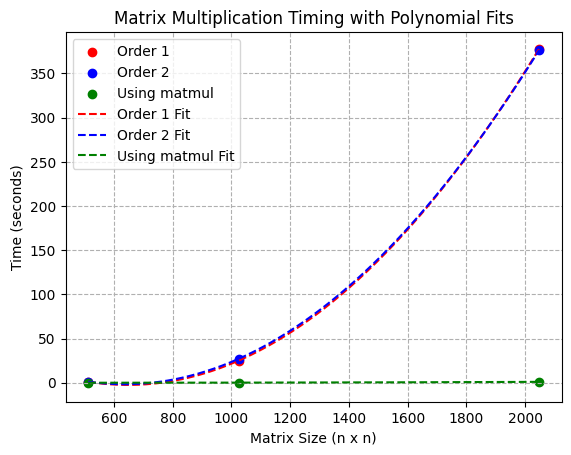

In [33]:
# Fit polynomials of degree 2 (quadratic)
poly_order_1 = np.polyfit(n, order_1_times, deg=2)
poly_order_2 = np.polyfit(n, order_2_times, deg=2)
poly_order_3 = np.polyfit(n, order_3_times, deg=2)

# Print the polynomial coefficients
print("Order 1 Polynomial Coefficients:", poly_order_1)
print("Order 2 Polynomial Coefficients:", poly_order_2)
print("Using matmul Polynomial Coefficients:", poly_order_3)

# Generate polynomial fit lines
n_fit = np.linspace(n.min(), n.max(), 500)  # More points for smoother curves
fit_order_1 = np.polyval(poly_order_1, n_fit)
fit_order_2 = np.polyval(poly_order_2, n_fit)
fit_order_3 = np.polyval(poly_order_3, n_fit)

# Scatter plot
plt.scatter(n, order_1_times, color='red', label='Order 1')
plt.scatter(n, order_2_times, color='blue', label='Order 2')
plt.scatter(n, order_3_times, color='green', label='Using matmul')

# Polynomial fit curves
plt.plot(n_fit, fit_order_1, color='red', linestyle='--', label='Order 1 Fit')
plt.plot(n_fit, fit_order_2, color='blue', linestyle='--', label='Order 2 Fit')
plt.plot(n_fit, fit_order_3, color='green', linestyle='--', label='Using matmul Fit')

# Titles and labels
plt.title('Matrix Multiplication Timing with Polynomial Fits')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True, linestyle="--")

plt.show()